# Project

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2Fprojects.ipynb)

<div class="alert alert-block alert-warning">
    <b>Schedule</b>
    
- Ask your supervisors for the data if not already provided (it is not included in this repository).
- Quick presentation.
- Final project presentation.
    
</div>

<div class="alert alert-block alert-info">
    <b>One problematic, One dataset, One (or more) method(s)</b>
    
- Quality of the dataset is key.
- Results on a clean notebook.
- Explain which method(s) you used and why.
- If a method fails, explain why.

</div>

## Project: Forecast of El Niño

<img alt="weather" src="images/ENSO-normal.png" width=400 style="float:left">
<img alt="weather" src="images/ENSO-El_Nino.png" width=400 style="float:right">

- Natural mode of variability of the pacific equatorial ocean
- Big impact on the local economy
- Question: What is the predictability of El Nino?

### Data set

<img alt="weather" src="images/monthly-sst-lanina-normal-elnino.png" width=400>

- Variable: Global sea surface temperature (SST)
- Temporal resolution: monthly mean
- Spatial resolution: 1 degree $\times$ 1 degree

### First steps

- Read about El nino
- Characterize El nino: i.e. introduce a classifier
- What does it mean ``to make a prediction''?

# Imports

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

from pathlib import Path

# Data

## Sea Surface Temperature (SST)

In [8]:
dir0 = Path('data')
file_sst = 'sst.mnmean.nc'

ds_sst = xr.open_dataset(Path(dir0, file_sst))
sst = ds_sst["sst"]

In [9]:
ds_sst

<xarray.Dataset> Size: 123MB
Dimensions:    (time: 475, lat: 180, lon: 360, nbnds: 2)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2021-06-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 123MB ...
    time_bnds  (time, nbnds) datetime64[ns] 8kB ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

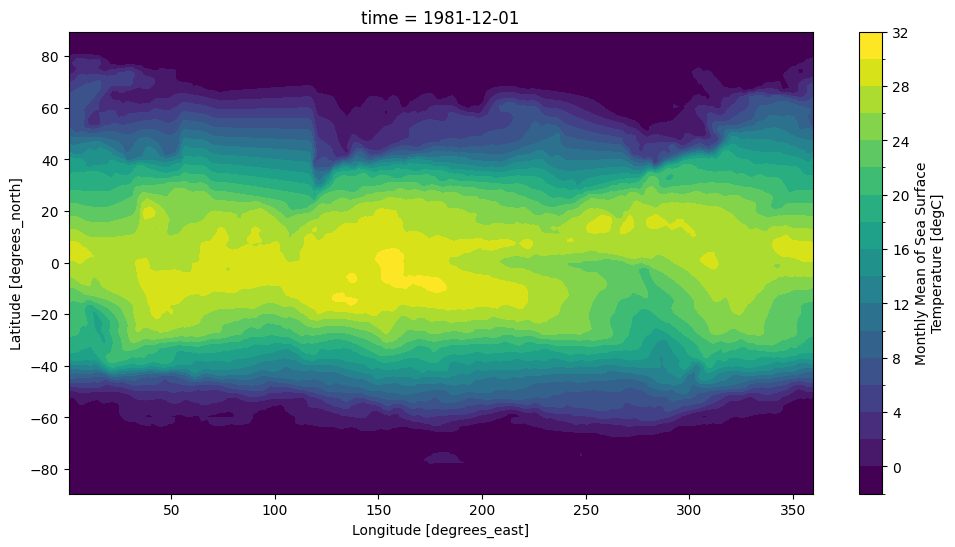

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
p = sst.isel(time=0).plot.contourf(ax=ax, levels=20, center=False)

## Mean Sea Level Pressure (MSLP)

In [11]:
file_mslp = 'mslp_coarse.nc'

ds_mslp = xr.open_dataset(Path(dir0, file_mslp))

In [12]:
ds_mslp

<xarray.Dataset> Size: 138MB
Dimensions:    (time: 531, latitude: 181, longitude: 360)
Coordinates:
  * latitude   (latitude) float32 724B 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float32 1kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2023-03-01
Data variables:
    msl        (time, latitude, longitude) float32 138MB ...
Attributes:
    Conventions:                 CF-1.6
    NCO:                         netCDF Operators version 4.9.1 (Homepage = h...
    title:                       ERA5 reanalysis
    data_type:                   1xmonthly fields analysis
    grid_resolution_in_degrees:  0.25
    source:                      credit: ECMWF, COPERNICUS Climate Change Ser...
    history:                     Thu Nov 30 14:28:43 2023: ncks -d longitude,...

# Characterizing El niño

According to the National Center for Atmospheric Research (NCAR), an El Niño event occurs when the 5-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region (5° N–5° S, 120°–170° W) remains above +0.4 °C for at least six consecutive months.

In [13]:
nino_1_2 = dict(lat=slice(0, -10),lon=slice(270, 280))   # 10°S–0°, 270°–280°E (90–80°W)
nino_3 = dict(lat=slice(5, -5),lon=slice(210, 270))   # 5°N–5°S, 210°–270°E (150–90°W)
nino_34 = dict(lat=slice(5, -5),lon=slice(190, 240))   # 5°N–5°S, 190°–240°E (170–120°W)
nino_4  = dict(lat=slice(5, -5),lon=slice(160, 210))   # 5°N–5°S, 160°–210°E (160°E–150°W)

sst_nino_1_2 = sst.sel(**nino_1_2).mean(dim=["lat", "lon"])
sst_nino_3   = sst.sel(**nino_3).mean(dim=["lat", "lon"])
sst_nino_34  = sst.sel(**nino_34).mean(dim=["lat", "lon"])
sst_nino_4   = sst.sel(**nino_4).mean(dim=["lat", "lon"])

## El Niño 3.4: monthly average SST

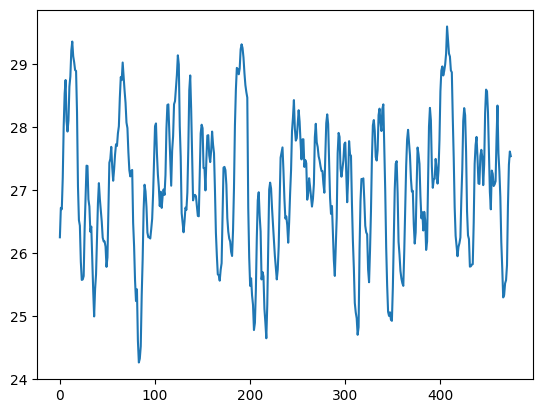

In [15]:
plt.plot(sst_nino_34)

## El Niño 3.4: smoothed (5-month-mean) anomaly

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.
Several slides and images are taken from the very good [Scikit-learn course](https://inria.github.io/scikit-learn-mooc/).

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>